# Lab 6.02 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

/tmp/ipykernel_75241/1793403083.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Dataframe


## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

Source: Departement Landbouw en Visserij op basis van StatBel

In [2]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";", decimal=',')
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


2. What are the datatypes for each of the columns.

In [3]:
farms.dtypes

year                            int64
number_of_farms                 int64
average_area_per_farm_(ha)    float64
dtype: object

3. Change the datatype of 'average_area_per_farm_(ha)' to float.

In [ ]:
#Already done by adding decimale=',' at pd.read_csv

4. Draw a scatter plot of the number of farms versus the year.


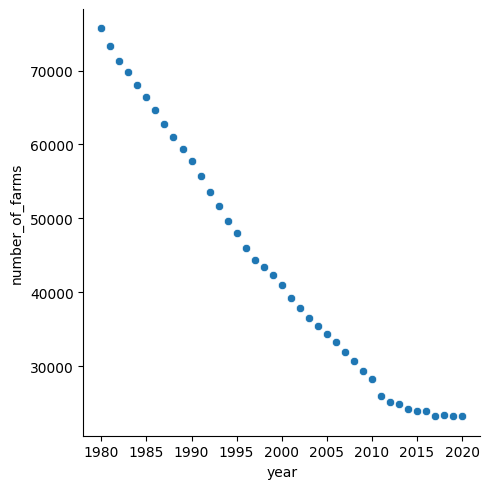

In [4]:
sns.relplot(data=farms, x='year', y='number_of_farms')

5. Is there a positive / negative relationship between year and number_of_farms?

R = -0.9861066349492859

In [5]:
cor = np.corrcoef(farms.year, farms.number_of_farms)[0][1]
print(f"R = {cor: .4f}")
print(f"R² = {cor ** 2 :.4f}")

R = -0.9861
R² = 0.9724


6. Is there a strong relationship between year and 'number_of_farms'?

R² = 0.9724062954910041

In [ ]:
# There is a very strong relationship between year and number of farms
# R < 0 => Het is een dalend verband
# |R| ~ 0.98 => Het is een uitzonderlijk sterk verband
# R² ~ 0.97 => Het is een uitzonderlijk sterk verband
# R² ~ 0.98 => 97% van de variantie in de afhankelijk veranderlijke wordt verklaard door de onafhankelijk veranderlijke


R² = 0.9724062954910041


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

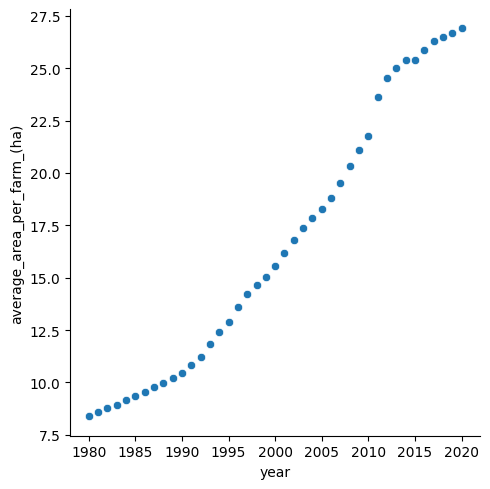

In [8]:
sns.relplot(data=farms, x='year', y='average_area_per_farm_(ha)')

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

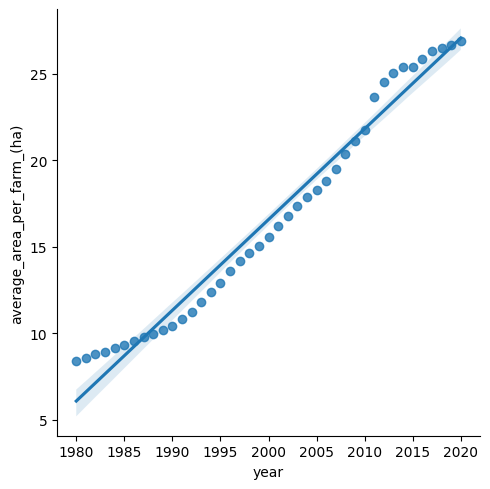

In [9]:
# We gaan de benaderende lijn teken en bereken wat de waarde zal zijn in 2035
sns.lmplot(data=farms,x='year', y='average_area_per_farm_(ha)')

In [11]:
# Korte methode voor berekening
x = farms.year
y = farms['average_area_per_farm_(ha)']
a, b = np.polyfit(x, y, 1)
print(f'y = {a} * x + {b}')
# Berekenen voor 2035
print(f'gemiddelde oppervlakte in 2035 = {a * 2035 + b}')


y = 0.5242334494773592 * x + -1031.8951916376452
gemiddelde oppervlakte in 2035 = 34.919878048780674


In [14]:
# Lange methode voor berekening

from sklearn.linear_model import LinearRegression
#methode van NumPy arrays die de vorm van de array verandert zonder de data te veranderen. De -1 is een placeholder die aangeeft dat het aantal rijen automatisch bepaald moet worden, zodat het totaal aantal elementen in de array hetzelfde blijft. De 1 geeft aan dat er één kolom moet zijn. 
#Dus als je een 1D array hebt en je wilt deze omzetten naar een 2D array met één kolom, dan gebruik je reshape(-1, 1).
x = farms.year.values.reshape(-1,1)
y = farms['average_area_per_farm_(ha)']

#je traint uw model obv x & y
model = LinearRegression().fit(x,y)

print(f"Regression line: ŷ = {model.intercept_:.4f} + {model.coef_[0]:.4f} x")
#Je doet een voorspelling voor 2035 obv uw model via model.predict
gemiddelde_oppervlakte_in_2035 = model.predict([[2035]])
print(gemiddelde_oppervlakte_in_2035)

Regression line: ŷ = -1031.8952 + 0.5242 x
[34.91987805]


In [17]:
farms['total_area'] = farms['number_of_farms'] * farms['average_area_per_farm_(ha)']
farms.head()
area_1980 = farms.iloc[0,3]
print(area_1980)
farms['relative_to_1980'] = farms['total_area'] / area_1980
farms.head()

634416.28


,year,number_of_farms,average_area_per_farm_(ha),total_area,relative_to_1980
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941


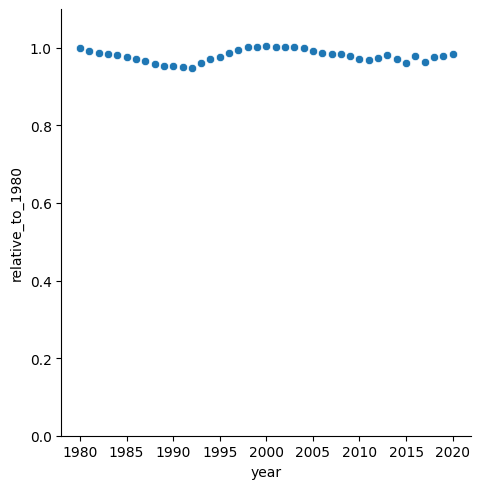

In [21]:
g = sns.relplot(data=farms, x='year',y='relative_to_1980')
g.set(ylim= [0,1.1])
#oppervlakte blijft, ondanks het dalende aantal boerderijen, ongeveer gelijk

8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

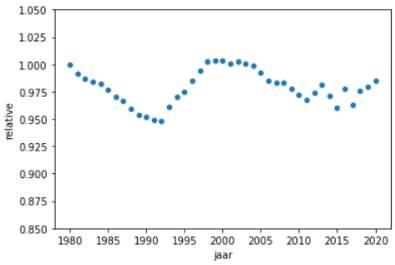


In [22]:
cor = np.corrcoef(farms.year, farms.relative_to_1980)[0][1]
print(f"R = {cor: .4f}")
print(f"R² = {cor ** 2 :.4f}")

R =  0.0379
R² = 0.0014


 R > 0 -> Een stijgend verband

 |R| ~ 0.04 => zwak verband

 R² -> Een zwak verband, waarbij 1% van de oppervlakte bepaald wordt door het jaar.

 1% van de variantie van de afhankelijk veranderlijke wordt verklaard door de onafhankelijk veranderlijke
 
 Oppervlakte is met andere woorden nauwelijks veranderd